# PAPILA dataset: usage example

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import utils

ROOT_DIR = '../'


## Read diagnostic labels

Returns three arrays of size 488: diagnosis label, eye ID and patient ID.

In [2]:
y, eyeID, patID = utils.get_diagnosis(ROOT_DIR)


## Read clinical data

Returns a pandas Data Frame with the clinical data.

In [3]:
df_od, df_os = utils.read_clinical_data(ROOT_DIR)
df_os

ID,Age,Gender,Diagnosis,dioptre_1,dioptre_2,astigmatism,Phakic/Pseudophakic,Pneumatic,Perkins,Pachymetry,Axial_Length,VF_MD
#002,47,0,2,-0.5,-1.5,88,0,20,NaN,603,23.77,0.17
#004,58,1,1,1.5,-2.5,85,1,NaN,19,511,22.96,-6.77
#005,89,1,1,-0.5,-2,100,1,24,10,575,24.33,-7.44
#006,69,0,2,1,-1.5,85,0,22,NaN,593,26.21,-3.31
#007,22,1,2,-0.25,-0.5,0,0,13,NaN,NaN,23.35,-2.61
...,...,...,...,...,...,...,...,...,...,...,...,...
#289,64,0,0,0.75,-1.5,93,1,10,NaN,531,22.31,NaN
#290,75,1,0,0.25,-0.25,160,1,19,NaN,573,22.01,NaN
#291,55,0,0,1.5,-1.25,76,0,14,NaN,443,23.51,NaN
#292,56,1,0,1.25,-0.75,79,0,9,NaN,479,23.84,NaN


## Read contours to transform into binary masks

RET002OD_cup_exp1.txt
Mask shape (1934, 2576)


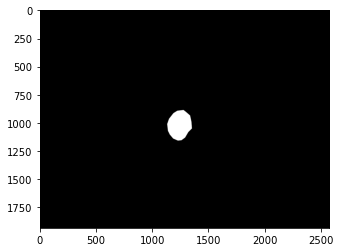

In [4]:
cont = os.listdir(ROOT_DIR + "ExpertsSegmentations/Contours/")[0] # getting file name
print(cont)
img_shape = (1934, 2576, 3) # passing a image shape
# getting mask
mask = utils.contour_to_mask(cont=cont, img_shape=img_shape, abs_path=ROOT_DIR)
print('Mask shape {}'.format(mask.shape))
plt.imshow(mask, cmap='gray') # plotting mask

Visual representation

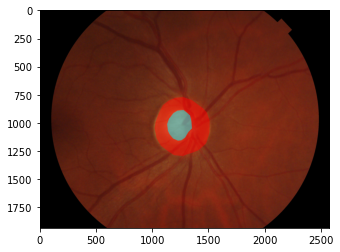

In [5]:
img_name = os.listdir(ROOT_DIR + "FundusImages")[0] # getting image name
img_from_dir = np.array(Image.open(ROOT_DIR + "FundusImages/" + img_name)) # reading image
cont = os.listdir(ROOT_DIR + "ExpertsSegmentations/Contours/") # getting list of countours from dir.
disc = utils.contour_to_mask(cont=cont[0], img_shape=img_shape, abs_path=ROOT_DIR) # getting disc contour
cup = utils.contour_to_mask(cont=cont[2], img_shape=img_shape, abs_path=ROOT_DIR) # getting cup contour
 # applying masks and plotting image
image = utils.apply_mask(image=img_from_dir, mask=cup, color=(1.0, 0.0, 0.0))
image = utils.apply_mask(image=image, mask=disc, color=(0.0, 1.0, 1.0))
plt.imshow(image) 